In [1]:
(asdf:load-system :imago/jupyter)
(asdf:load-system :diff-boundary-corrfn)
(asdf:load-system :numpy-file-format)

T

T

T

SB-KERNEL:REDEFINITION-WITH-DEFMETHOD: redefining VALIDATE-SUPERCLASS (#<STANDARD-CLASS ORG.TFEB.HAX.ABSTRACT-CLASSES:ABSTRACT-CLASS>
                                                                       #<STANDARD-CLASS COMMON-LISP:STANDARD-CLASS>) in DEFMETHOD
SB-KERNEL:REDEFINITION-WITH-DEFMETHOD: redefining VALIDATE-SUPERCLASS (#<STANDARD-CLASS COMMON-LISP:STANDARD-CLASS>
                                                                       #<STANDARD-CLASS ORG.TFEB.HAX.ABSTRACT-CLASSES:ABSTRACT-CLASS>) in DEFMETHOD
SB-KERNEL:REDEFINITION-WITH-DEFUN: redefining MAGICL::SVD-LISP in DEFUN


In [2]:
(load
  (asdf:system-relative-pathname :diff-boundary-corrfn
                                 #p"examples/functions.lisp"))

T

In [9]:
;; Create a function which sums values of 6 random bell-shaped curves
(defparameter *field*
  (example-functions:gaussian-field
    (example-functions:random-gaussians 6)))

*FIELD*

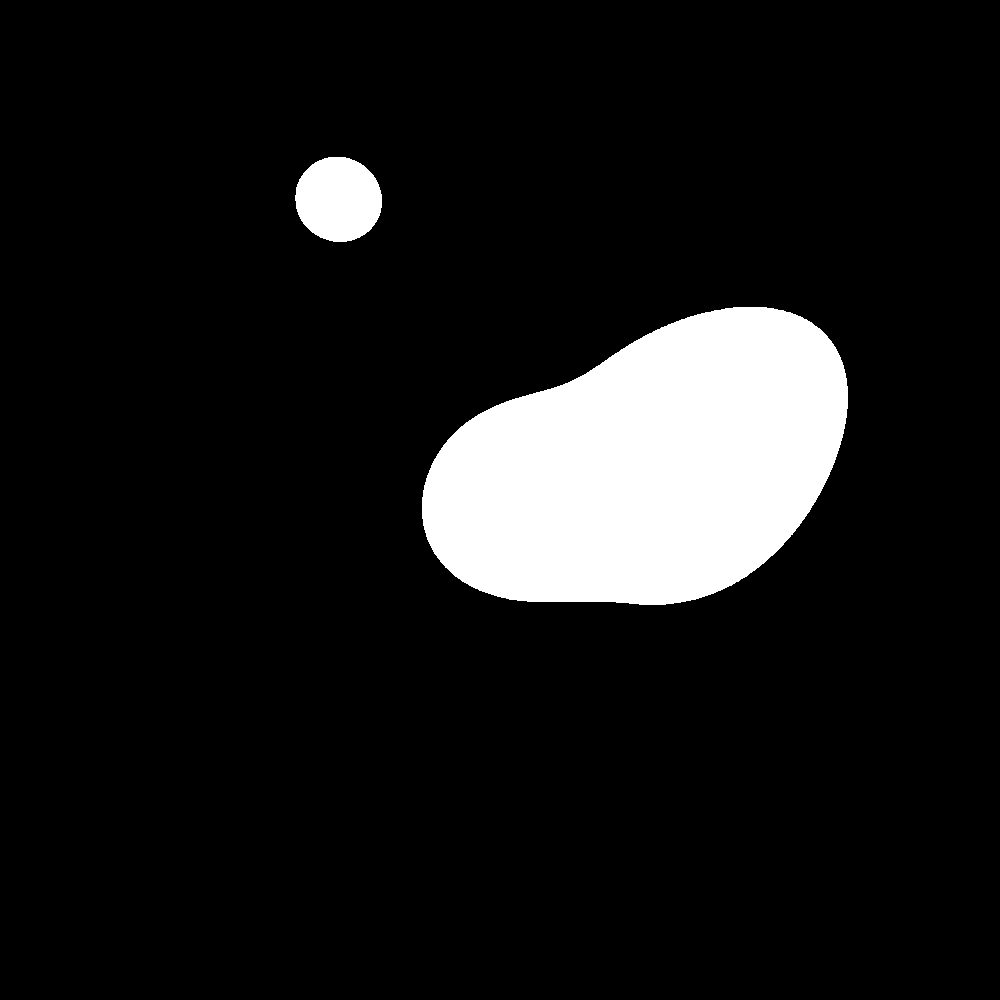

In [11]:
;; Evaluate it at points in uniform 3000x3000 grid and save an image
(let ((image (imago:make-binary-image-from-pixels
               (let ((descr (diff-boundary-corrfn:discretize-field 3000 2 *field*)))
                 (aops:vectorize* 'bit (descr) (if (> descr 5.0) 1 0))))))
  (imago:write-image image "/jails/julia/home/vasily/field.pbm")
  (imago-jupyter:show-image
    (imago:resize image 1000 1000)))

In [12]:
;; Calculate surface-surface function in a half-circle with radius R=0.1
;; Probably we need to disable division by zero trap because F_{ss} is ill-defined.
(time
  (defparameter *ss*
    (sb-int:with-float-traps-masked
      (:divide-by-zero)
      (let ((interface (diff-boundary-corrfn:interface *field* 2 5d0)))
        (diff-boundary-corrfn:surface2-at-dist interface 1d-1 150)))))

*SS*

Evaluation took:
  16.355 seconds of real time
  16.355294 seconds of total run time (16.353219 user, 0.002075 system)
  [ Run times consist of 0.050 seconds GC time, and 16.306 seconds non-GC time. ]
  100.00% CPU
  107 lambdas converted
  62,148,229,132 processor cycles
  19,473,339,376 bytes consed
  


In [13]:
;; Save results as a numpy array
(numpy-file-format:store-array
  (let ((ss (remove-if (lambda (x) (> (car x) 50)) *ss*)))
    (make-array (list (length ss) 3) :element-type 'double-float :initial-contents ss))
  "/jails/julia/home/vasily/ss-precise.npy")

NIL